# Importeren van libraries en dataset

In [167]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
import random

# Ik wil een Mexicaans of Hollands gerecht

##### Filter tag data op "mexicaans" en "aziatisch" en maak een dummy dataframe

In [169]:
df_tag = pd.read_csv('Dataset Foodboost/tags.csv')
df_tag = df[df['tag'].isin(['mexicaans', 'aziatisch'])]
df_tag

,Unnamed: 0,recipe,tag
27,27,Massaman curry,aziatisch
44,44,Ajam pangang,aziatisch
68,68,Pico de gallo,mexicaans
78,78,Sajoer boontjes,aziatisch
83,83,Koe loe kai,aziatisch
...,...,...,...
45671,45671,Thaise gehaktballetjes met paksoi,aziatisch
45747,45747,Quesadillas met gerookte kip en paprika,mexicaans
45810,45810,Gegratineerde wraps,mexicaans
45834,45834,Indische gehaktschotel,aziatisch


In [116]:
df_tag_new = pd.get_dummies(df_tag['tag'])
df_tag_new

,aziatisch,mexicaans
27,1,0
44,1,0
68,0,1
78,1,0
83,1,0
...,...,...
45671,1,0
45747,0,1
45810,0,1
45834,1,0


###### Verander de ingredienten data naar 0 en 1 en voeg de dummy data hieraan toe

In [117]:
df_ingredient = pd.read_csv('Dataset Foodboost/ingredients.csv')
df_ingredient = pd.concat([df_ingredient, df_tag_new], axis = 1)

# Drop de onnodige kolommen
df_ingredient.drop(['quantity', 'unit'], axis = 1, inplace = True)
df_ingredient

,Unnamed: 0,recipe,ingredient,aziatisch,mexicaans
0,0,Kruidnoten met choco-discodip,melkchocolade,NaN,NaN
1,1,Kruidnoten met choco-discodip,kruidnoten,NaN,NaN
2,2,Kruidnoten met choco-discodip,discodip,NaN,NaN
3,3,Kruidnoten in marsepein,blanke marsepein,NaN,NaN
4,4,Kruidnoten in marsepein,ongezouten roomboter,NaN,NaN
...,...,...,...,...,...
71804,71804,Biefstuk met rodewijnsaus en ham,olijfolie,NaN,NaN
71805,71805,Biefstuk met rodewijnsaus en ham,biefstukken,NaN,NaN
71806,71806,Biefstuk met rodewijnsaus en ham,boter,NaN,NaN
71807,71807,Biefstuk met rodewijnsaus en ham,serranoham,NaN,NaN


In [118]:
df_recipes = pd.read_csv('Dataset Foodboost/recipes.csv')

# Drop de onnodige kolommen
df_recipes.drop([ 'Unnamed: 0', 'persons','time','calories','stars','url','image'], axis = 1, inplace = True)
df_recipes

,title
0,Kruidnoten met choco-discodip
1,Kruidnoten in marsepein
2,Kruidnoten met chocodips
3,Pepernotentaart met marsepeinstrik
4,Perencake
...,...
8701,Paddenstoelen en courgettegratin
8702,Peren-amandelcoupe
8703,Ceviche met sint-jakobsschelpen
8704,Pittige truffels


In [151]:
df_recipes_lekker = df_recipes.sample(n=200)
df_recipes_lekker

,title
1796,Plaatpizza met spruitjes en salami
4006,Zelfgemaakte zalmburger met bietensalade
1269,Unicorn smoothie
8477,Rodekool met spekjes
300,Grissini met sesam
...,...
7773,Paprika-tomatensalsa
719,Meringuetaart met praliné en salted caramel
7548,Ierse stamp met bosui en waterkers
7255,Garnalencurry met spinazie


In [155]:
for i in range (200):
    
    random_recept = df_recipes_lekker.iloc[i]
    random_recept[0]
    print("'" + random_recept[0] + "'" + ': ' + " ,")

'Plaatpizza met spruitjes en salami':  ,
'Zelfgemaakte zalmburger met bietensalade':  ,
'Unicorn smoothie':  ,
'Rodekool met spekjes':  ,
'Grissini met sesam':  ,
'Sticky speklapjes met rozemarijnaardappeltjes':  ,
'Nasi met kip en zelfgemaakte boemboe':  ,
'Courgettetaart met haver fraîche':  ,
'Mexicaanse wraps met groente en gegrilde biefstuk':  ,
'Carpaccio-bonbon met kruidensalade':  ,
'Mojito met gember en jalapeño':  ,
'Couscous met gebakken kip, wortel, abrikozen en citroen ':  ,
'Wokmie met zoetzure omelet':  ,
'Gekleurde kidswafels ':  ,
'Witte-bonenpuree, Chinese kool en venkel-tijmworst':  ,
'Semifreddo met cantuccini':  ,
'Zomerrisotto met mozzarella-braadworstjes':  ,
'Witvis met notentopping, bloemkool puree en salsa':  ,
'Geurige maaltijdsoep met rijst en een eitje':  ,
'Pommes duchesses met zoete aardappel':  ,
'Farfalle met groenten en hüttenkäse':  ,
'Gegrilde vega-tomatenspiesjes met rodekool-broccolisalade':  ,
'Gestoofde gehaktballetjes met bladerdeeg':  ,
'Marsh

In [159]:
lekker = {'Plaatpizza met spruitjes en salami':  1,
'Zelfgemaakte zalmburger met bietensalade':  1,
'Unicorn smoothie':  0,
'Rodekool met spekjes':  0,
'Grissini met sesam':  0,
'Sticky speklapjes met rozemarijnaardappeltjes':  0,
'Nasi met kip en zelfgemaakte boemboe':  1,
'Courgettetaart met haver fraîche':  0,
'Mexicaanse wraps met groente en gegrilde biefstuk':  1,
'Carpaccio-bonbon met kruidensalade':  1,
'Mojito met gember en jalapeño':  0,
'Couscous met gebakken kip, wortel, abrikozen en citroen ':  1,
'Wokmie met zoetzure omelet':  1,
'Gekleurde kidswafels ':  0,
'Witte-bonenpuree, Chinese kool en venkel-tijmworst':  0,
'Semifreddo met cantuccini':  0,
'Zomerrisotto met mozzarella-braadworstjes':  1,
'Witvis met notentopping, bloemkool puree en salsa':  1,
'Geurige maaltijdsoep met rijst en een eitje':  0,
'Pommes duchesses met zoete aardappel':  0,
'Farfalle met groenten en hüttenkäse':  0,
'Gegrilde vega-tomatenspiesjes met rodekool-broccolisalade':  0,
'Gestoofde gehaktballetjes met bladerdeeg':  1,
'Marshmallow-bananensplit met chocoladesaus uit een gourmetpannetje':  1,
'Stéphane Reynauds gestoofde sla':  0,
'Ui-prei-kapucijneromelet met bonenkruid':  0,
'Ovenaardappelen met kurkuma en romesco':  0,
'Lauwwarme noedelsalade met Japanse kip':  0,
'Paddenstoelensoep &amp; roomkaasballen':  0,
'Burgers met rode-uienjam':  1,
'Asperges met botersaus':  0,
'Geroosterde groenten met gorgonzola':  0,
'Gourmet-omelet met bosui en sesam':  1,
'Mexicaans stoofvlees met bonen':  1,
'Bietenhummus':  0,
'Opperdepop: kiphapje met wortel en doperwtjes 7-9 mnd':  1,
'Kleine tortillas met Hollandse Nieuwe':  1,
'Speltsalade met granaatappel en za’atar':  1,
'Vegaschnitzel met ratatouille uit de oven':  0,
'Gekruide rösti &amp; wortel met een zachtgekookt eitje':  1,
'Hartige popcorn':  0,
'Camembert met druiven van de BBQ ':  0,
'Open sandwich met worst en mosterd':  1,
'Pasta met zwarte bonen':  0,
'Artisjokdip':  0,
'Pittige gehaktballetjes met snelle bami':  1,
'Curryworstjes':  1,
'Gewokte bloemkool met rode curry':  0,
'Sushicado van Fooddeco':  0,
'Hummus in 15 minuten':  0,
'Fit Girl Codes kip-mangosalade':  1,
'Homemade friet met truffelmayo &amp; parmezaan van FrietHoes':  0,
'Saté van gedroogd fruit':  0,
'Broodpudding van fruit- noten- en rozemarijnbrood':  1,
'Vegastoof met gele paprika, broccoli &amp; basmatirijst':  0,
'Linzensoep met aardappel, prei en worst':  0,
'Linzenstoof met bloemkool en vegastukjes':  0,
'Linzenstoof met gepocheerde eieren':  0,
'Amuse van paté, spek en gekaramelliseerde sjalot':  0,
'Saté babi van de bbq':  1,
'Kaasfondue dips':  1,
'Lasagne':  1,
'Oventosti met vegagehackt en geitenkaas':  0,
'Eenpersoonscurry':  1,
'Bananen-kokoscake':  1,
'White Russian':  1,
'Carpaccio van tomaat met parmezaan en pijnboompitten':  1,
'Aziatische koolsalade':  1,
'Hele mosterdkip uit de oven':  0,
'Filetlapjes met geroosterde biet':  0,
'Wraps met krokante cajunkip, avocado &amp; citroencrème':  1,
'Thaise kokosnoedelsoep met garnalen':  0,
'Braadworst met uien-stroopjus':  1,
'Spaanse surf &amp; turfspiesjes met pittige tomatensaus':  1,
'Kokospannenkoekjes met tropisch fruit':  1,
'Spruitjes met peer':  0,
'Curry van bloemkool en broccoli':  0,
'Indiase curry met geroosterde bloemkool':  1,
'Geroosterde paprika met geitenkaas en pistache':  0,
'Sinaasappeltaart met eiwitschuim':  1,
'Krokante kaneelkrans':  1,
'Regenboogcarpaccio met pijnboompitten en parmaham':  0,
'Rijkgevulde groentebowl met tonijn &amp; pittige dressing':  0,
'Paprikaomelet met salade':  0,
'Tropische clafoutis met kokosmelk &amp; mango':  1,
'Vietnamese pho':  0,
'Zoete-aardappelfriet met vegaburgers':  0,
'Shichimi-zalm met aspergenoedels':  1,
'Thaise salade van gekneusde komkommers ':  0,
'Spekkoek met pisangroom':  1,
'Croque Buvette':  0,
'Hollandse rösti met sperziebonensalade':  0,
'Gegrilde kipdijfilet met rozemarijn':  1,
'Zoete-aardappelkoekjes met verse rozemarijn':  1,
'Volkorentoast met avocado &amp; eikruim':  1,
'Eipotjes met tomaten en spinazie':  1,
'Glutenvrije pizza met gerookte kip':  1,
'Bietentartaar met geitenkaas en gebakken kappertjes':  1,
'Boerenkoolstoof met chorizo':  1,
'Buddha-bowl met Chioggia-bietjes en bietenhummus':  0,
'Krokante schnitzel met zoete-aardappelgratin en broccoli':  1,
'Patatas bravas met biefstuk en broccoli':  1,
'Groene groentesalade met stroopdressing':  0,
'Gepofte biet met geitenkaas en walnoten':  0,
'Groenteomelet met sojasaus, champignons &amp; chili-mayosaus ':  0,
'Pulled chicken met chipotlesaus':  1,
'Goudbruine broc­co­li­-to­nijn­taart':  1,
'Patatas bravas':  1,
'Medaillons met avocadosalsa':  0,
'Zweedse gehaktballetjes met room':  1,
'Dunne crackers met ricotta-fetaspread en asperges':  1,
'Knapperige flowersprouts  ':  0,
'Mokka-havermout':  1,
'Pasta uit de oven met courgette':  1,
'Schelvis in ham met aardappelpuree en spinazie':  1,
'Lunchbowl met kikkererwten &amp; limoen-yoghurtdressing':  0,
'Garnalencocktail met aardappel en rucola':  1,
'Pompoenstoof':  0,
'Pasta met mosselen en lamsoren':  1,
'Spaghetti bolognese met rijkgevulde saus':  1,
'Spiegelei':  1,
'Gefrituurde augurkjes':  0,
'Snelle spaghetti met paddenstoelen en spekjes':  1,
'Gehaktspies met zelfgemaakte tzatziki':  1,
'Pizza bianca met rauwe parmaham':  0,
'Kip met tonijnsaus':  1,
'Tortillacracker met pompoen':  0,
'Biefstuk tagliata':  1,
'Warmgerookte zalm met pasta en tomatensaus':  1,
'Griekse yoghurt met appelcompote':  1,
'Kerstkip':  1,
'Wortel met witte kaas':  0,
'Piri piri drumsticks met tzatziki':  1,
'Traybake met vegetarische balletjes en ovengroenten':  0,
'Vissaté met pittige satésaus ':  0,
'Pad thai met peultjes en omelet':  0,
'Pasteitje kipragout met salade ':  1,
'Verse tagliolini met broccoli en venkelworst':  1,
'Pastasalade pesto met burrata ':  1,
'Crèmesoep van schorseneren':  0,
'Regenboogsalade met bramendressing':  0,
'Trifle met amandelkoekjes, bessencrème en honeycomb':  0,
'Smoothie van twee kleuren':  0,
'Kropsla-kruidensalade':  0,
'Couscous met pittige garnalen':  1,
'Pizzabaguettes met paprika en salami':  1,
'Gehaktballetjes met saus':  1,
'Gnocchi met hazelnoten in tomatensaus':  0,
'Gemberbier':  1,
'Mini-meatloafs met kwartelei':  1,
'Paprika-broodsalade':  1,
'Wortelpasta carbonara met tuinerwten':  0,
'Vega aardappelcurry met boontjes en roti':  0,
'Scharrelkipreepjes met gemengde groenten':  1,
'Visburger met wasabimayo':  0,
'Makkelijk borrelplank':  1,
'Pruimentaart':  0,
'Appel-spruitenstamppot met braadworst ':  1,
'Mediterrane visstoof met couscous':  1,
'Jennekes Tobleronetaart':  0,
'Atomic buffalo turds':  1,
'Bretons gehaktbrood':  1,
'Toast met serranoham &amp; zelfgemaakte knolselderijremoulade':  1,
'Kip met sinaasappel-hoisinsaus en rijst':  1,
'Maaltijdsoep met kikkererwten':  0,
'Crème brûlée van kokos':  1,
'Pannenkoekjes met zoet spiegelei':  1,
'Millionaires shortbread':  1,
'Volkorentortillachips met salsa van mango en limoen':  1,
'Chickslovefoods hutspotkoekjes':  0,
'Franse vissoep':  0,
'Piadina met artisjok, veldsla en ricotta':  1,
'Uienbloemen met kabeljauw':  1,
'Zomerse punch met appel en meloen':  1,
'Linzen-tomatenstoof met bloemkool':  0,
'Overnight ontbijtgranen met appel':  1,
'Lentequiche met salami, puntpaprika en kruiden':  1,
'Linzensalade met gegrilde groenten':  0,
'Kipburger met gebakken aardappel &amp; spinazie':  0,
'Pasta met tonijn, spinazie &amp; asperges':  1,
'Aubergine-paprikalasagne met romige kaassaus':  0,
'Rainbow quinoasalade met gegrilde kalkoen en amandelen van Dafne Schippers':  0,
'Volkorennachos met tomatensalsa en 30+ kaas':  0,
'Tonijn-tomatenstoof met knapperige boontjes':  1,
'Mexicaanse biercocktail met tomaat &amp; jalapeño':  1,
'Pappardelle met groene asperges en ham':  1,
'Snelle tajine met dadelstroop':  0,
'Chili dog':  0,
'Gefrituurd ijs met frambozencoulis':  0,
'Bloemkoolbodemquiche met groente en kokosmelk':  0,
'Orzo met kip en garnalen':  1,
'Flammkuchen met zalm en ui':  1,
'Croquetas':  0,
'Gebakken biet met rösti en slavink':  0,
'Tuinerwtensoep':  0,
'Paprika-tomatensalsa':  1,
'Meringuetaart met praliné en salted caramel':  1,
'Ierse stamp met bosui en waterkers':  1,
'Garnalencurry met spinazie':  1,
'Komkommersalade met gebakken chorizo':  1}

lekker_recepten = pd.DataFrame(data=lekker.items())
lekker_recepten.rename(columns = {0:'recipe', 1:'lekker'}, inplace = True)
lekker_recepten

,recipe,lekker
0,Plaatpizza met spruitjes en salami,1
1,Zelfgemaakte zalmburger met bietensalade,1
2,Unicorn smoothie,0
3,Rodekool met spekjes,0
4,Grissini met sesam,0
...,...,...
195,Paprika-tomatensalsa,1
196,Meringuetaart met praliné en salted caramel,1
197,Ierse stamp met bosui en waterkers,1
198,Garnalencurry met spinazie,1


In [166]:

df_recipe_aantalingredienten_keuken_lekker = pd.concat([lekker_recepten, df_tag_new], axis = 1)
df_recipe_aantalingredienten_keuken_lekker

,recipe,lekker,aziatisch,mexicaans
0,Plaatpizza met spruitjes en salami,1.0,NaN,NaN
1,Zelfgemaakte zalmburger met bietensalade,1.0,NaN,NaN
2,Unicorn smoothie,0.0,NaN,NaN
3,Rodekool met spekjes,0.0,NaN,NaN
4,Grissini met sesam,0.0,NaN,NaN
...,...,...,...,...
45671,NaN,NaN,1.0,0.0
45747,NaN,NaN,0.0,1.0
45810,NaN,NaN,0.0,1.0
45834,NaN,NaN,1.0,0.0


In [112]:
#df_recipes_lekker.insert(['lekker'])
#df_recipes_lekker

df_recipes_lekker["lekker"] = np.nan
df_recipes_lekker

,title,lekker
7382,Snelle erwtensoep met hotdogs,NaN
6838,Aardappel-champignonschotel met kaas,NaN
1366,Gehaktballen uit de airfryer,NaN


In [76]:
X = df_new.drop('aziatisch', axis=1)
y = df_new['mexicaans']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [77]:
#knn = KNeighborsClassifier(n_neighbors = np.arange(1, 9)

#knn.fit(X_train, y_train)

#print(knn.score(X_test, y_test))

In [78]:
#y_pred = knn.predict(X_test)

#accuracy = accuracy_score(y_test, y_pred)
#print('Accuracy:', accuracy)

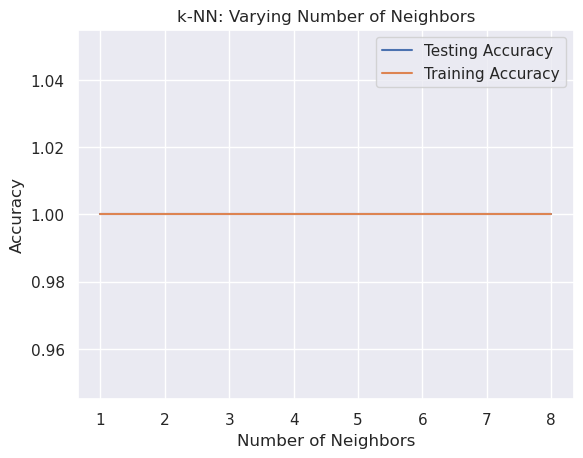

In [79]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()